In [1]:
import pandas as pd
import numpy as np
import random as rnd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [137]:
train_df = pd.read_csv('../Titanic/train.csv')
test_df = pd.read_csv('../Titanic/test.csv')
combine = [train_df, test_df]

In [138]:
train_length = len(train_df['PassengerId'])
test_length = len(test_df['PassengerId'])
total_length = train_length + test_length

In [139]:
for column in columns:
    ratio = (train_df[column].isna().sum()+test_df[column].isna().sum())/total_length
    print('{column}:{ratio}'.format(column=column, ratio=ratio))

PassengerId:0.0
Survived:0.0
Pclass:0.0
Name:0.0
Sex:0.0
Age:0.20091673032849502
SibSp:0.0
Parch:0.0
Ticket:0.0
Fare:0.0007639419404125286
Cabin:0.774637127578304
Embarked:0.0015278838808250573


In [140]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [141]:
train_df = train_df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId', 'Embarked'], axis=1)
test_df = test_df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId', 'Embarked'], axis=1)
combine = [train_df, test_df]

In [142]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [143]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [144]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [145]:
for dataset in combine:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch']

train_df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [146]:
train_df = train_df.drop(['SibSp', 'Parch'], axis=1)
test_df = test_df.drop(['SibSp', 'Parch'], axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Family
0,0,3,0,22.0,7.2500,1
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,1
4,0,3,0,35.0,8.0500,0


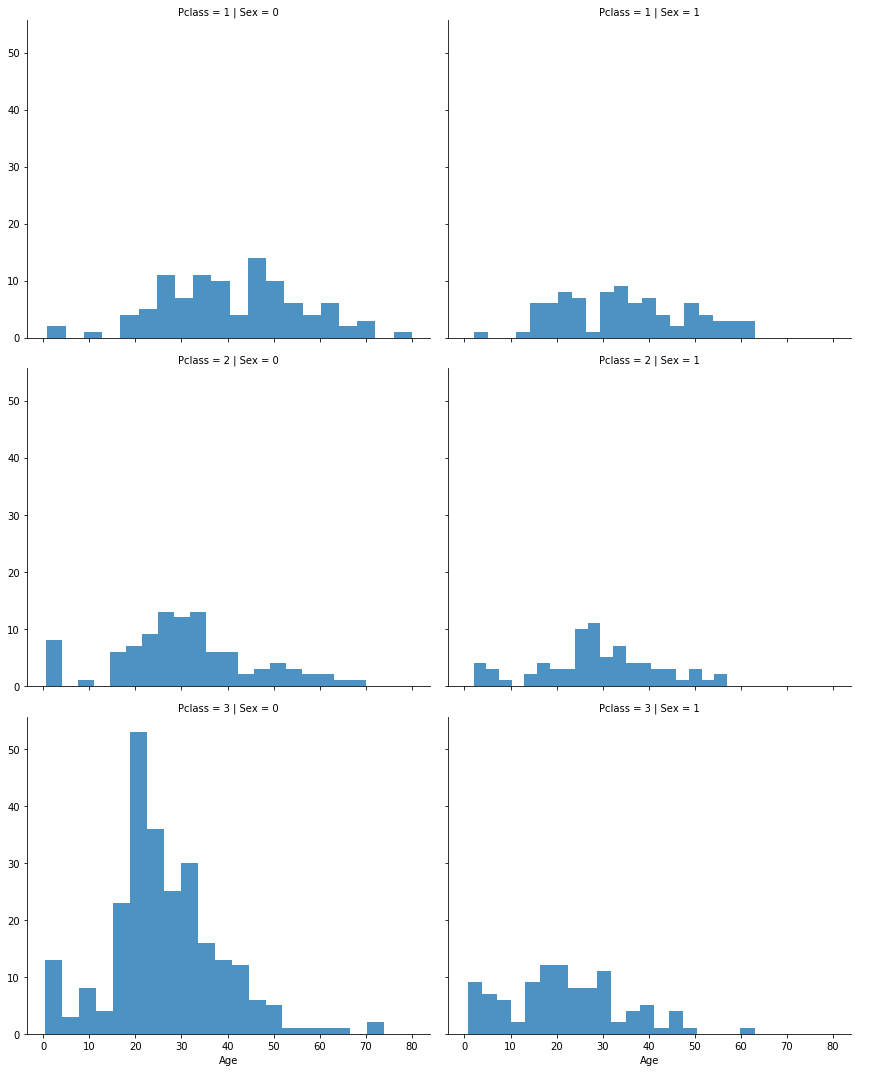

In [147]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=5, aspect=1.2)
grid.map(plt.hist, 'Age', alpha=.8, bins=20)
grid.add_legend()